In [ ]:
# [Xixi(Jialin), Liu]
# [20196588]
# [MMA]
# [2021W]
# [869]
# [2020-08]

In [75]:
# Answer to Question [1], Part [1]

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import pandas_profiling

import itertools

import scipy

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer

from kmodes.kmodes import KModes

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This will ensure that matplotlib figures don't get cut off when saving with savefig()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

C:\Users\liuxi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Read in data from Uncle Steve's GitHub repository
customer = pd.read_csv("https://raw.githubusercontent.com/stepthom/sandbox/master/data/jewelry_customers.csv")


In [23]:
customer.head(50)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


In [4]:
str(customer)

'     Age  Income  SpendingScore       Savings\n0     58   77769       0.791329   6559.829923\n1     59   81799       0.791082   5417.661426\n2     62   74751       0.702657   9258.992965\n3     59   74373       0.765680   7346.334504\n4     87   17760       0.348778  16869.507130\n..   ...     ...            ...           ...\n500   28  101206       0.387441  14936.775389\n501   93   19934       0.203140  17969.693769\n502   90   35297       0.355149  16091.401954\n503   91   20681       0.354679  18401.088445\n504   89   30267       0.289310  14386.351880\n\n[505 rows x 4 columns]'

In [3]:
list(customer)
customer.shape
customer.info()
customer.head(n=10)
customer.tail(n=10)

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
495,66,77052,0.707262,6296.417311
496,22,132948,0.889800,2839.786357
497,91,30756,0.303698,15492.004711
498,30,98030,0.411112,16316.842905
499,25,128625,0.816739,4914.117127
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


In [4]:
#check missing data
pd.DataFrame(customer).isna().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [4]:
customer.dtypes

Age                int64
Income             int64
SpendingScore    float64
Savings          float64
dtype: object

In [5]:
scaler = StandardScaler()
customer1 = customer.copy()
features = ['Age','Income','SpendingScore','Savings']
customer1[features] = scaler.fit_transform(customer1[features])
customer1

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686
...,...,...,...,...
500,-1.286268,0.714535,-0.453557,0.621787
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313
503,1.326092,-1.524929,-0.579866,1.322452


In [6]:
customer1.dtypes

Age              float64
Income           float64
SpendingScore    float64
Savings          float64
dtype: object

{2: 0.5212589967674505, 3: 0.6963481945884472, 4: 0.7581191889903789, 5: 0.8048976287755765, 6: 0.6329321562095103, 7: 0.446241357222514, 8: 0.2966712516286317}
{2: 1022.3905044613805, 3: 384.81118593043806, 4: 189.7017879665956, 5: 66.51111374859076, 6: 61.14438411779816, 7: 56.892795315756366, 8: 52.91645639809087}


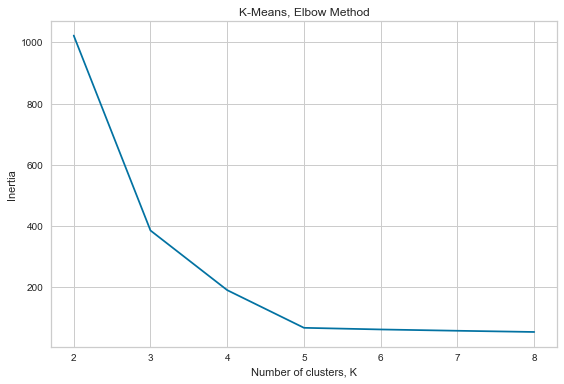

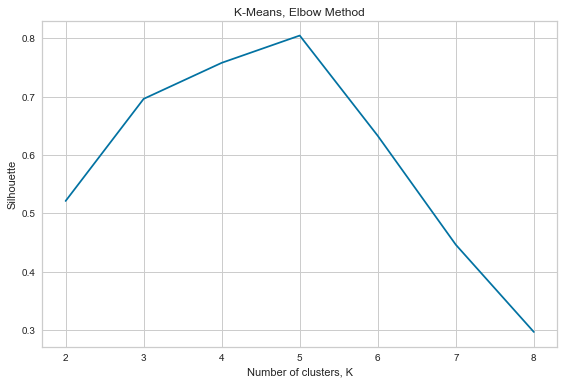

In [8]:
#Hyperparameter Turning (Experiment with lots of Ks)
#k is the only hyperparameter and Edidean metric is the only metric

inertias = {}
silhouettes = {}
for k in range(2, 9):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42)
    kmeans = kmeans.fit(customer1)
    inertias[k] = kmeans.inertia_
    silhouettes[k] = silhouette_score(customer1, kmeans.labels_, metric='euclidean')

print(silhouettes)
print(inertias)

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));

plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

In [9]:
# K=5 is the optimal # of clusters
kmeans_final = KMeans(init='k-means++', n_init=10, n_clusters=5, random_state=42)
kmeans_final = kmeans_final.fit(customer1)
kmeans_final.inertia_
silhouette_score(customer1, kmeans_final.labels_, metric='euclidean')
kmeans_final.cluster_centers_
kmeans_final.labels_

66.51111374859076

0.8048976287755765

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

array([2, 2, 2, 2, 0, 3, 2, 0, 0, 0, 4, 1, 1, 1, 2, 4, 2, 0, 0, 4, 1, 4,
       2, 0, 4, 3, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 3, 2,
       2, 3, 4, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 3, 2, 4, 2, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1, 0, 0, 0, 1, 4, 2, 0, 2, 2, 1, 2,
       1, 2, 3, 0, 4, 3, 2, 1, 0, 2, 2, 3, 2, 3, 2, 4, 2, 0, 2, 1, 0, 2,
       0, 4, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0,
       2, 2, 1, 0, 1, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 3, 2,
       2, 2, 4, 2, 1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 1, 1, 2, 2, 4, 2, 2, 0,
       2, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 4, 1, 0,
       0, 1, 4, 0, 0, 3, 2, 1, 1, 2, 1, 0, 0, 1, 2,

In [49]:
from scipy import stats
import seaborn as sns

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print('All Data:')
print('Number of Instances: {}'.format(customer1.shape[0]))
customer.describe(include=[np.number]).transpose()
for i, label in enumerate(set(kmeans_final.labels_)):
    n = customer.iloc[kmeans_final.labels_==label].shape[0]
          
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(n))

    customer.iloc[kmeans_final.labels_==label].describe(include=[np.number]).transpose()
   
    



All Data:
Number of Instances: 505


,count,mean,std,min,25%,50%,75%,max
Age,505.00,59.02,24.14,17.00,34.00,59.00,85.00,97.00
Income,505.00,75513.29,35992.92,12000.00,34529.00,75078.00,107100.00,142000.00
SpendingScore,505.00,0.51,0.26,0.00,0.30,0.37,0.77,1.00
Savings,505.00,11862.46,4949.23,0.00,6828.71,14209.93,16047.27,20000.00



Cluster 0:
Number of Instances: 147


,count,mean,std,min,25%,50%,75%,max
Age,147.00,87.78,3.51,79.00,85.00,88.00,91.00,97.00
Income,147.00,27866.10,6448.81,12000.00,23361.00,27771.00,32601.00,46977.00
SpendingScore,147.00,0.33,0.05,0.20,0.30,0.32,0.36,0.47
Savings,147.00,16659.26,1183.85,13470.97,15957.28,16711.07,17433.13,20000.00



Cluster 1:
Number of Instances: 126


,count,mean,std,min,25%,50%,75%,max
Age,126.00,32.78,3.79,22.00,30.00,33.00,35.00,44.00
Income,126.00,105265.81,6080.62,89598.00,100760.25,106002.50,108858.75,119877.00
SpendingScore,126.00,0.31,0.05,0.17,0.28,0.31,0.34,0.41
Savings,126.00,14962.78,1061.73,12207.53,14223.79,14976.94,15682.29,17968.55



Cluster 2:
Number of Instances: 157


,count,mean,std,min,25%,50%,75%,max
Age,157.00,59.96,3.38,51.00,58.00,59.00,62.00,68.00
Income,157.00,72448.06,6240.26,56321.00,68463.00,72027.00,76594.00,90422.00
SpendingScore,157.00,0.77,0.05,0.66,0.74,0.77,0.80,0.91
Savings,157.00,6889.97,1052.28,4077.66,6225.38,6845.06,7497.23,10547.78



Cluster 3:
Number of Instances: 50


,count,mean,std,min,25%,50%,75%,max
Age,50.00,24.18,3.66,17.00,22.00,24.50,27.00,31.00
Income,50.00,128029.12,5688.90,117108.00,123042.00,128162.00,131435.75,142000.00
SpendingScore,50.00,0.90,0.04,0.81,0.87,0.89,0.93,1.00
Savings,50.00,4087.52,1277.75,0.00,3275.32,4361.97,4986.86,6089.48



Cluster 4:
Number of Instances: 25


,count,mean,std,min,25%,50%,75%,max
Age,25.00,86.00,3.66,77.00,84.00,86.00,88.00,93.00
Income,25.00,119944.04,4941.05,110582.00,117347.00,119429.00,123651.00,128596.00
SpendingScore,25.00,0.07,0.04,0.00,0.04,0.06,0.08,0.16
Savings,25.00,14808.68,1159.34,12554.69,14047.39,14773.41,15391.95,17833.09


In [42]:
from scipy import stats
import seaborn as sns
for label in set(kmeans_final.labels_): 
    n = customer.iloc[kmeans_final.labels_==label].shape[0]
    print('\nCluster {}:'.format(label)) 
    print('Number of Instances: {}'.format(n))
    X_tmp = customer[kmeans_final.labels_==label].copy() 
    X_tmp.loc['mean'] = X_tmp.mean() 
    X_tmp.tail(13)

    


Cluster 0:
Number of Instances: 147


,Age,Income,SpendingScore,Savings
485,90.00000,22782.000000,0.356307,15924.071708
486,91.00000,28165.000000,0.303693,17460.179350
488,92.00000,18724.000000,0.327862,15341.381110
489,97.00000,27271.000000,0.283923,14928.165597
490,84.00000,36463.000000,0.353621,16563.372591
493,92.00000,36032.000000,0.336968,17348.599881
494,87.00000,29909.000000,0.342152,18142.232747
497,91.00000,30756.000000,0.303698,15492.004711
501,93.00000,19934.000000,0.203140,17969.693769
502,90.00000,35297.000000,0.355149,16091.401954



Cluster 1:
Number of Instances: 126


,Age,Income,SpendingScore,Savings
454,31.000000,107932.000000,0.374242,12207.526078
457,35.000000,110106.000000,0.286769,14924.537223
460,28.000000,100592.000000,0.259598,15520.355776
461,33.000000,116616.000000,0.320930,15104.498114
463,28.000000,94762.000000,0.303596,15352.521937
468,32.000000,117050.000000,0.311356,14310.546207
471,31.000000,101209.000000,0.304323,16917.571691
476,33.000000,106757.000000,0.258396,14431.652799
477,33.000000,107100.000000,0.342435,14895.473479
482,32.000000,108417.000000,0.287371,16696.398659



Cluster 2:
Number of Instances: 157


,Age,Income,SpendingScore,Savings
467,61.000000,72027.000000,0.762325,6926.123598
469,63.000000,70580.000000,0.766509,7262.108723
470,58.000000,70676.000000,0.764028,7664.415651
472,62.000000,73675.000000,0.796619,4688.657157
473,60.000000,63476.000000,0.751900,7543.542802
474,62.000000,67731.000000,0.819170,5956.555677
478,65.000000,70430.000000,0.696994,6971.164886
479,59.000000,69408.000000,0.879906,6491.771150
480,65.000000,71229.000000,0.787890,9024.337461
491,58.000000,70369.000000,0.904520,7461.567503



Cluster 3:
Number of Instances: 50


,Age,Income,SpendingScore,Savings
406,25.00,120957.00,0.877673,5590.447216
412,21.00,129726.00,0.951792,4550.799522
415,26.00,125662.00,0.926818,6089.478323
442,17.00,136255.00,0.935876,4126.226651
445,24.00,120465.00,0.907485,4838.348350
451,27.00,122671.00,0.910107,4206.287239
456,17.00,123828.00,0.942013,3798.840400
458,28.00,127699.00,0.881425,5490.814956
466,18.00,123718.00,0.806553,4420.445821
487,26.00,123005.00,0.984526,4371.234733



Cluster 4:
Number of Instances: 25


,Age,Income,SpendingScore,Savings
283,90.0,124170.00,0.030751,14773.407206
288,83.0,117347.00,0.155694,15086.701120
311,85.0,118169.00,0.123196,14855.951024
312,88.0,114767.00,0.032208,17833.093470
343,84.0,115237.00,0.068778,14396.568282
351,91.0,118794.00,0.019212,14047.388986
353,77.0,128596.00,0.040824,14503.410786
368,84.0,110582.00,0.079049,14937.995170
383,87.0,117564.00,0.128280,14000.248965
414,88.0,123651.00,0.029027,13504.577572


In [19]:
from scipy.spatial import distance

for i, label in enumerate(set(kmeans_final.labels_)):    
    X_tmp = customer[kmeans_final.labels_==label].copy()
    
    exemplar_idx = distance.cdist([kmeans_final.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    exemplar


Cluster 0:


,320
Age,87.000000
Income,12000.000000
SpendingScore,0.342991
Savings,16180.265252



Cluster 1:


,339
Age,34.000000
Income,89598.000000
SpendingScore,0.340152
Savings,12832.768721



Cluster 2:


,278
Age,59.000000
Income,56321.000000
SpendingScore,0.806566
Savings,6129.288986



Cluster 3:


,360
Age,28.000000
Income,117108.000000
SpendingScore,0.857078
Savings,4749.879237



Cluster 4:


,368
Age,84.000000
Income,110582.000000
SpendingScore,0.079049
Savings,14937.995170


In [22]:
customer.iloc[442]

Age                  17.000000
Income           136255.000000
SpendingScore         0.935876
Savings            4126.226651
Name: 442, dtype: float64